In [1]:
import numpy as np    # si pas encore fait
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.01]])  # matrice de déformation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # matrice de rotation

# On génère deux nuages de points déformés et tournés
rndn3d1 = np.random.randn(500,3)
rndef1 = rndn3d1.dot(s1).dot(r1)
rndn3d2 = np.random.randn(500,3)
# Le deuxième nuage de point est translaté selon l'axe z
rndef2 = rndn3d2.dot(s1).dot(r1) + [0, 0, 1]
rndef = np.concatenate((rndef1, rndef2))
print(rndef.shape)

(1000, 3)


In [2]:
lcls1 = np.ones(500)
lcls2 = 2 * np.ones(500)
lcls = np.concatenate((lcls1, lcls2))
print(lcls)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

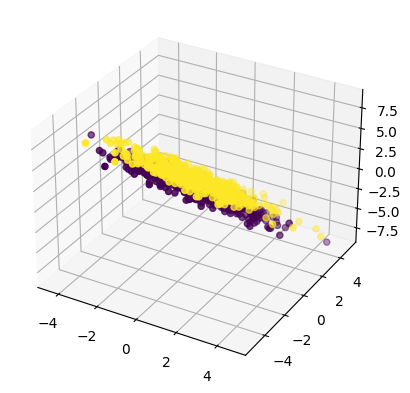

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0], rndef[:,1], rndef[:,2], c=lcls)
plt.show()

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(rndef,lcls)

LinearDiscriminantAnalysis()

In [5]:
rndt = lda.transform(rndef)
print(rndt.shape)

(1000, 1)


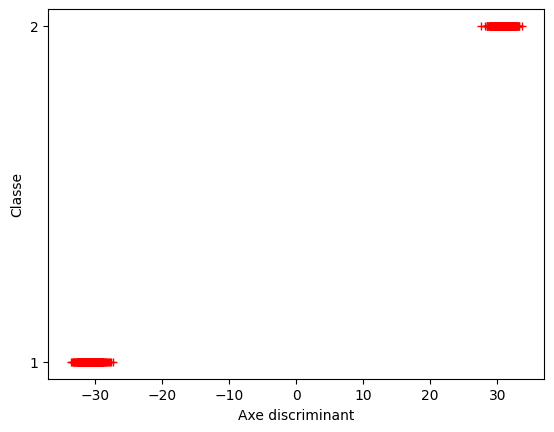

In [6]:
plt.plot(rndt, lcls, 'r+')
plt.xlabel("Axe discriminant")
plt.ylabel("Classe")
plt.yticks([1, 2])
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(rndef)

PCA(n_components=2)

(1000, 2)


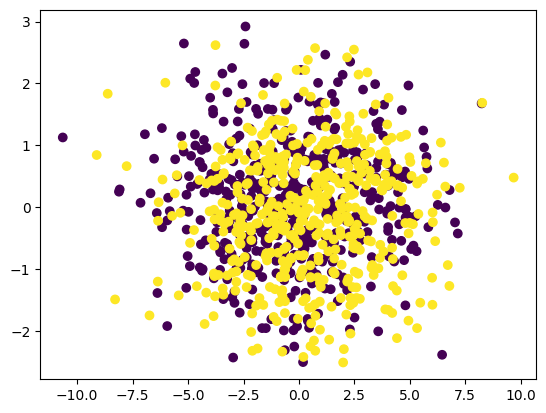

In [8]:
rndp = pca.transform(rndef)
print(rndp.shape)
# (1000, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(rndp[:,0], rndp[:,1], c=lcls)
plt.show()

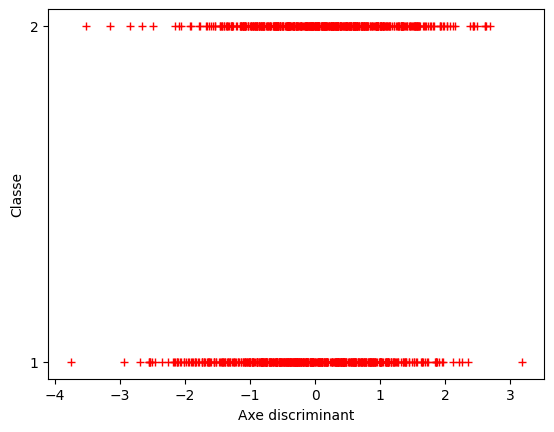

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(rndp,lcls)
rndpt = lda.transform(rndp)

plt.plot(rndpt, lcls, 'r+')
plt.xlabel("Axe discriminant")
plt.ylabel("Classe")
plt.yticks([1, 2])
plt.show()

In [11]:
!wget -nc http://cedric.cnam.fr/~crucianm/src/leaf.csv

--2024-10-13 10:33:25--  http://cedric.cnam.fr/~crucianm/src/leaf.csv
Resolving cedric.cnam.fr (cedric.cnam.fr)... 163.173.128.10
Connecting to cedric.cnam.fr (cedric.cnam.fr)|163.173.128.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41213 (40K) [text/x-comma-separated-values]
Saving to: ‘leaf.csv’

leaf.csv            100%[===================>]  40.25K  --.-KB/s    in 0.09s   

2024-10-13 10:33:25 (434 KB/s) - ‘leaf.csv’ saved [41213/41213]



[[1.0000e+00 1.0000e+00 7.2694e-01 1.4742e+00 3.2396e-01 9.8535e-01
  1.0000e+00 8.3592e-01 4.6566e-03 3.9465e-03 4.7790e-02 1.2795e-01
  1.6108e-02 5.2323e-03 2.7477e-04 1.1756e+00]
 [1.0000e+00 2.0000e+00 7.4173e-01 1.5257e+00 3.6116e-01 9.8152e-01
  9.9825e-01 7.9867e-01 5.2423e-03 5.0016e-03 2.4160e-02 9.0476e-02
  8.1195e-03 2.7080e-03 7.4846e-05 6.9659e-01]]


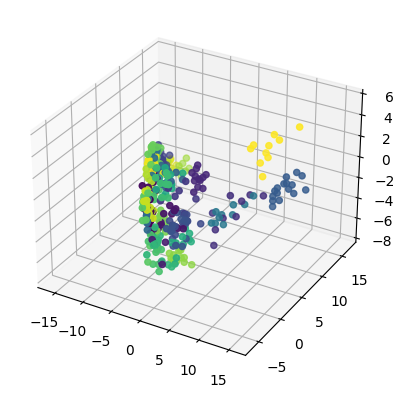

In [12]:
leaf = np.loadtxt('leaf.csv', delimiter=',')
print(leaf[:2,:])

lda = LinearDiscriminantAnalysis()
lda.fit(leaf[:,2:],leaf[:,0])

leafl = lda.transform(leaf[:,2:])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(leafl[:,0],leafl[:,1],leafl[:,2],c=leaf[:,0])
plt.show()